In [4]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
mjd=[]
for i in range(1, 22):
    hdul=fits.open(f'VIS_{i:02}.fits')
    mjd.append(hdul[0].header['MJD-OBS'])
print(mjd)

[60555.028281584, 60555.035923651, 60555.043557964, 60555.051185794, 60555.058816981, 60555.066448168, 60555.084288992, 60555.091935456, 60555.09956722, 60555.139519703, 60555.147158528, 60555.154795731, 60555.162423444, 60555.170056487, 60555.177691023, 60555.227819568, 60555.235468576, 60555.243098022, 60555.250732446, 60555.258363512, 60555.265993652]


In [5]:
pip install jplephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
ltt_barylist=[]
jpllist=[]
for i in range (1,22):
    from astropy import time, coordinates as coord, units as u
    #from astropy.coordinates import solar_system_ephemeris
    VIS = coord.SkyCoord("21:21:18.6", "-09:43:29.0",
                        unit=(u.hourangle, u.deg), frame='icrs')
    paranal = coord.EarthLocation.of_site('paranal')
    times = time.Time([mjd[i-1]+((hdul[0].header['EXPTIME']/2) / 86400.0)], format='mjd',
                  scale='utc', location=paranal)
    ltt_bary = times.light_travel_time(VIS)
    ltt_barylist.append(ltt_bary)
    #ltt_bary_jpl = times.light_travel_time(VIS, ephemeris='jpl')
    #jpllist.append(ltt_bary_jpl)

#print(jpllist)
numbers_in_days = [i.value.item() for i in ltt_barylist] #correction in days
print(numbers_in_days)

[0.005436845973337269, 0.005436585722610279, 0.005436325226285006, 0.005436064428756404, 0.005435802981249959, 0.005435540986784509, 0.0054349262824831815, 0.005434661862897241, 0.005434397365993202, 0.005433002989808766, 0.005432734511803484, 0.00543246548930426, 0.005432196203476474, 0.005431926135480997, 0.0054316554253145645, 0.005429863844909416, 0.005429588432979391, 0.005429313224432339, 0.005429037350700499, 0.0054287611289492695, 0.005428484488504196]


In [7]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SpectralCoord
sc_vel_list = []
sc_nm_list = []
for i in range(1, 22):
    file = f'VIS_{i:02}.fits'
    hdul = fits.open(file)
    flux_data = hdul[0].data
    header = hdul[0].header
    start_wavelength_nm = header['CRVAL1']
    wavelength_step_nm = header['CDELT1']
    pixel_axis = np.arange(len(flux_data))
    wavelength_nm = start_wavelength_nm + (pixel_axis * wavelength_step_nm)
    sc = SpectralCoord(wavelength_nm, unit='nm')
    sc_kms = sc.to(u.km / u.s, doppler_convention='optical', doppler_rest=656.276 * u.nm)
    sc_nm_list.append(sc)
    sc_vel_list.append(sc_kms)


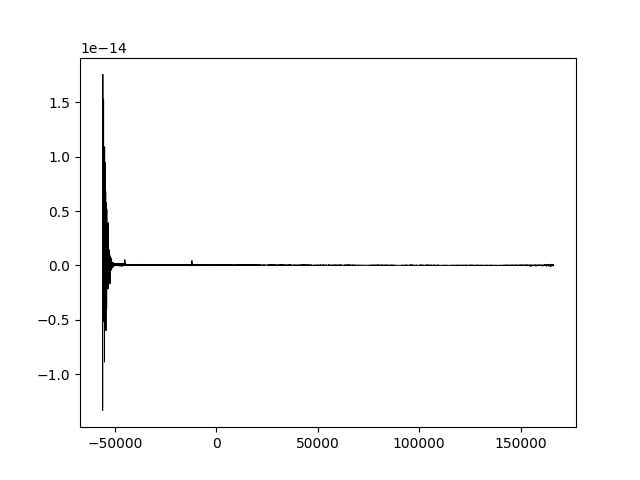

In [8]:
%matplotlib widget
plt.plot(sc_vel_list[11], flux_data, color='black', lw=0.7)

START

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.constants import c
from astropy.coordinates import SpectralCoord
barycorrlist=[]
sc_nm_list = []
sc_kms_list = []
mjd=[]
ltt_barylist=[]
bjdlist = []
for i in range(1, 22):
    hdul=fits.open(f'VIS_{i:02}.fits')
    mjd.append(hdul[0].header['MJD-OBS'])
for i in range(1, 22):
    file = f'VIS_{i:02}.fits'
    hdul = fits.open(file)
    flux_data = hdul[0].data
    header = hdul[0].header
    start_wavelength_nm = header['CRVAL1']
    wavelength_step_nm = header['CDELT1']
    pixel_axis = np.arange(len(flux_data))
    wavelength_nm = start_wavelength_nm + (pixel_axis * wavelength_step_nm)
    sc = SpectralCoord(wavelength_nm, unit='nm')
    sc_kms = sc.to(u.km / u.s, doppler_convention='optical', doppler_rest=656.276 * u.nm)
    sc_nm_list.append(sc)
    sc_kms_list.append(sc_kms)
    
for i in range (1,22):
    from astropy import time, coordinates as coord, units as u
    VIS = coord.SkyCoord("21:21:18.6", "-09:43:29.0", unit=(u.hourangle, u.deg), frame='icrs')
    paranal = coord.EarthLocation.of_site('paranal')
    times = time.Time([mjd[i-1]+(300 / 86400.0)], format='mjd', scale='utc', location=paranal)
    barycorr = VIS.radial_velocity_correction(obstime=times)
    barycorrlist.append(barycorr) #correction in velocity
    ltt_bary = times.light_travel_time(VIS)
    ltt_barylist.append(ltt_bary) #correction in days
    time_barycentre = times.tdb + ltt_bary.value.item() #corrected times BMJD
    bjdlist.append(time_barycentre)

    
bary_kmslist = []
for i in range (1,22):
    bary_nm = sc_nm_list[i-1].with_radial_velocity_shift(barycorrlist[i-1])
    bary_kms = bary_nm.to(u.km / u.s, doppler_convention='optical', doppler_rest=656.276 * u.nm)
    bary_kmslist.append(bary_kms)

print(barycorrlist) 

[<Quantity [-10194.99200861] m / s>, <Quantity [-10214.7365389] m / s>, <Quantity [-10235.01765739] m / s>, <Quantity [-10255.79867379] m / s>, <Quantity [-10277.06638092] m / s>, <Quantity [-10298.77093337] m / s>, <Quantity [-10350.98046548] m / s>, <Quantity [-10373.88144174] m / s>, <Quantity [-10396.98798975] m / s>, <Quantity [-10520.22977384] m / s>, <Quantity [-10543.88199859] m / s>, <Quantity [-10567.44580416] m / s>, <Quantity [-10590.85101032] m / s>, <Quantity [-10614.09740135] m / s>, <Quantity [-10637.12764214] m / s>, <Quantity [-10779.74571957] m / s>, <Quantity [-10799.7409893] m / s>, <Quantity [-10819.1065493] m / s>, <Quantity [-10837.86986304] m / s>, <Quantity [-10855.97522508] m / s>, <Quantity [-10873.3954442] m / s>]


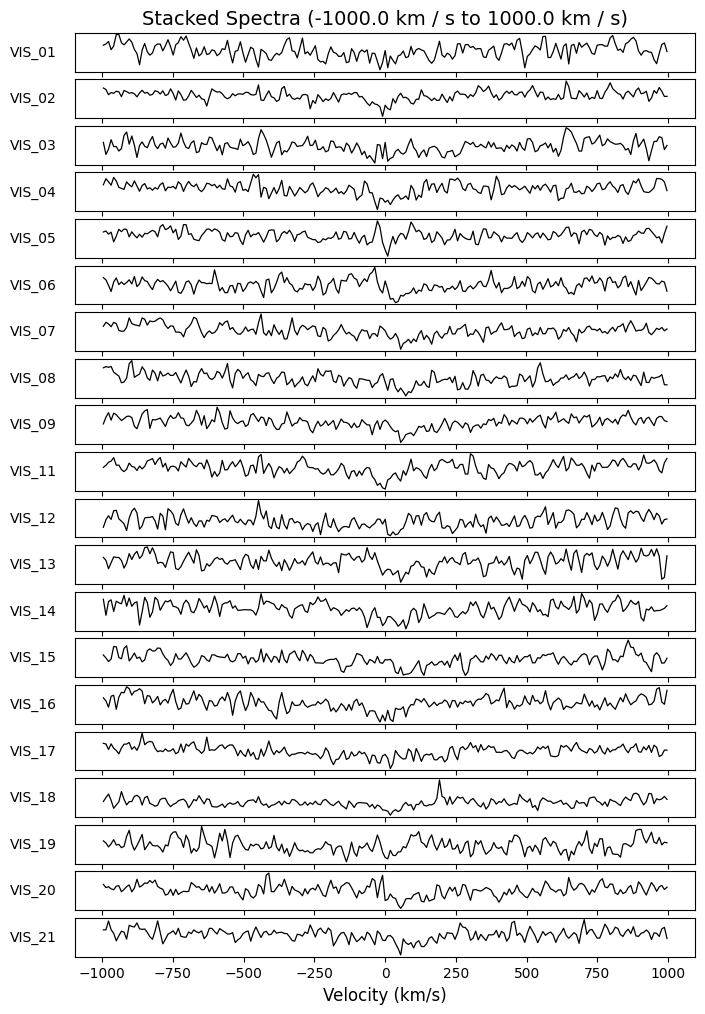

In [17]:
%matplotlib inline
def plot_stacked_spectra(file_list, min_v, max_v):
    n_files = len(file_list)
    fig, axes = plt.subplots(n_files, 1, figsize=(8, 0.6 * n_files), sharex=False)

    for i, fitfile in enumerate(file_list):
        hdul = fits.open(fitfile)
        flux_data = hdul[0].data
        #flux_error = hdul[1].data
        ax = axes[i]
        mask = (bary_kmslist[i] >= min_v) & (bary_kmslist[i] <= max_v)
        ax.plot(bary_kmslist[i][mask], flux_data[mask], color='black', linewidth=0.9)
        file_number = fitfile[4:6]
        ax.set_ylabel(f'VIS_{file_number}', fontsize=10, rotation=0, labelpad=30, va='center')
        #ax.fill_between(velocity[mask], flux_data[mask] - flux_error[mask], flux_data[mask] + flux_error[mask], color='lightgrey', alpha=0.5)
        ax.tick_params(axis='y',left=False, right=False, labelleft=False)
    
    
        min_flux_index = np.argmin(flux_data[mask]) #give index of the position of the minimum flux

        core_velocity = bary_kmslist[i][mask][min_flux_index]
        core_flux = flux_data[mask][min_flux_index]
   
        #ax.plot([core_velocity.value, core_velocity.value], [0,5], color='red', linewidth=1.5, linestyle='-')
    
    axes[-1].set_xlabel('Velocity (km/s)', fontsize=12)
    axes[0].set_title(f'Stacked Spectra ({min_v} to {max_v})', fontsize=14)
    fig.savefig('stack.png', dpi=300, bbox_inches='tight')
    
    plt.show()

fits_files = [f'VIS_{i:02}.fits' for i in range(1, 22) if i not in [10]]

plot_stacked_spectra(fits_files, -1000 * u.km/u.s, 1000 * u.km/u.s)

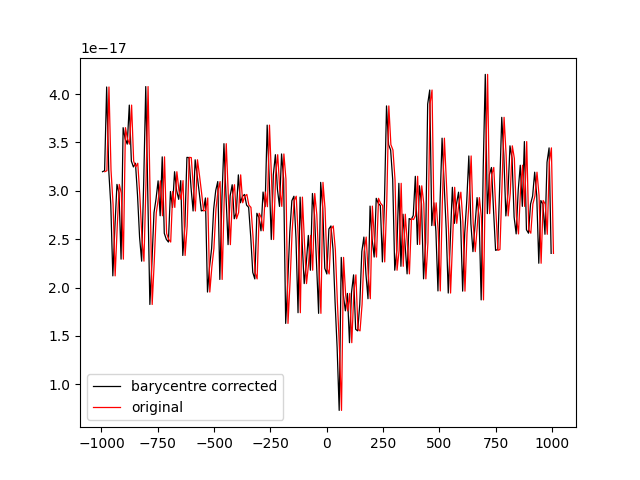

In [18]:
%matplotlib widget
mask = (bary_kmslist[3] >= -1000 * u.km/u.s) & (bary_kmslist[3] <= 1000 * u.km/u.s)
plt.plot(bary_kmslist[3][mask], flux_data[mask], color='black', linewidth=0.9, label='barycentre corrected')
plt.plot(sc_kms_list[3][mask], flux_data[mask], color='red', linewidth=0.9,label='original')
plt.legend()

In [9]:
T0_val = 59385.541376
P = 0.0953979016
from astropy import time, coordinates as coord, units as u
T0 = time.Time(T0_val, format='mjd', scale='tdb')
orbitalphase = []

for i, btime in enumerate(bjdlist):
    time_difference = btime - T0
    phase = float(np.mod(time_difference.value / P, 1))
    orbitalphase.append(phase)

print(orbitalphase)

[0.14402478841839184, 0.22412934649946692, 0.30415262144379085, 0.3841079356643604, 0.46409843255787564, 0.5440889237197553, 0.7310973274452408, 0.8112479329847702, 0.8912444462457643, 0.31002817157423124, 0.390098659450814, 0.4701521391452843, 0.5501061379763996, 0.6301159998129151, 0.7101415052056836, 0.23559072974239825, 0.3157678873340046, 0.39573999012100103, 0.4757642673685041, 0.5557533410319593, 0.6357327035530034]


/tmp/ipykernel_70204/2535629772.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phase = float(np.mod(time_difference.value / P, 1))
